# Настроить линтер!

Например <a href="https://marcobelo.medium.com/setting-up-python-black-on-visual-studio-code-5318eba4cd00">black</a>

# Вероятность, введение

Вероятность имеет 2 равносильных определения

- Частотная - вероятность это частота результата эксперимента, повторенного многократно
- Баесовская - количественная оценка нашей неуверенности/неопределенности чего либо.

In [1]:
from collections import Counter


import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

In [2]:
# Частотная


np.random.seed(42)


coin_array = np.random.randint(0, 2, size=10000)


coin_frequencies = Counter(coin_array)


print(f"number of heads and tails: {coin_frequencies}")


print(f"probability of head: {coin_frequencies[0] / coin_array.shape[0]}")

number of heads and tails: Counter({0: 5013, 1: 4987})
probability of head: 0.5013


In [3]:
# Баесовская


np.random.seed(42)


coin_array = np.random.binomial(1, 0.7, size=100)


coin_frequencies = Counter(coin_array)


print(f"number of heads and tails: {coin_frequencies}")


print(f"probability of head: {coin_frequencies[0] / coin_array.shape[0]}")

number of heads and tails: Counter({1: 70, 0: 30})
probability of head: 0.3


Баесовская интерпритация позволяет генерировать данные меньших размеров

## Виды неопределенности

In [4]:
# Неопределенность механизмов генерации данных


np.random.seed(2)


left = np.random.binomial(1, 0.7, size=500)


right = np.random.binomial(1, 0.3, size=500)


coin_array = np.append(left, right)


coin_frequencies_left = Counter(coin_array[:500])


coin_frequencies_right = Counter(coin_array[500:])


coin_frequencies = Counter(coin_array)


print(f"number of heads and tails: {coin_frequencies}")


print(f"number of heads and tails: {coin_frequencies_left}")


print(f"number of heads and tails: {coin_frequencies_right}")

number of heads and tails: Counter({0: 505, 1: 495})
number of heads and tails: Counter({1: 362, 0: 138})
number of heads and tails: Counter({0: 367, 1: 133})


In [5]:
# алеаторическая неопределенность


np.random.seed(2)


coin_array = np.random.binomial(1, 0.7, size=1000)


coin_frequencies = Counter(coin_array)


print(f"number of heads and tails: {coin_frequencies}")

number of heads and tails: Counter({1: 729, 0: 271})


## Вероятность как расширение логики

### Вероятность события

Определим событие A - как некоторое бинарное событие, например будет пробка на ул. Ленина с 17:00 до 19:00 или сила тока > 3А

Тогда: P(A) - вероятность наступления события A (P - probability)

$ 0 \le P(A) \le 1 $

- P(A) = 0 - означает что событие точно не наступит
- P(A) = 1 - означает что событие точно наступит

$ P(\bar{A}) $ - вероятность не наступления события A

$ P(\bar{A}) = 1 - P(A)$

$ 0 \le P(\bar{A}) \le 1$ - доказать?

In [6]:
np.random.seed(0)


coin_array = np.random.binomial(1, 0.6, size=(1000,))


p_head = coin_array[coin_array == 0].shape[0] / coin_array.shape[0]


p_tail = coin_array[coin_array == 1].shape[0] / coin_array.shape[0]


print(f"Вероятность орла: {p_head}")


print(f"Вероятность решки: {p_tail}")


print(f"1 - вероятность орла: {1 - p_head}")

Вероятность орла: 0.39
Вероятность решки: 0.61
1 - вероятность орла: 0.61


### Совместная вероятность

Определим $ P(A \land B) = P(A, B) $ - как вероятность одновременного наступления событий A и B - примеры?

In [7]:
np.random.seed(5)


coin_array = np.random.binomial(1, 0.6, size=(10000, 2))


intersection_events = coin_array[(coin_array[:, 0] == 0) & (coin_array[:, 1] == 1)]


p_intersection = intersection_events.shape[0] / coin_array.shape[0]


print(f"Вероятность совместного события: {p_intersection}")

Вероятность совместного события: 0.2403


### Вероятность объеденения событий

$ P (A \lor B) $ - вероятность наступления или события A или события B

$ P (A \lor B) = P(A) + P(B) - P(A \land B) $

<img src="./img/union.png">

Если события взаимоисключающие то:

$ P (A \lor B) = P(A) + P(B) $ - нарисовать диаграмму

In [8]:
np.random.seed(5)


coin_array = np.random.binomial(1, 0.6, size=(10000, 2))


intersection_events = coin_array[(coin_array[:, 0] == 0) & (coin_array[:, 1] == 1)]


union_events = coin_array[(coin_array[:, 0] == 0) | (coin_array[:, 1] == 1)]


p_head = coin_array[(coin_array[:, 0] == 0)].shape[0] / coin_array.shape[0]


p_tail = coin_array[(coin_array[:, 1] == 1)].shape[0] / coin_array.shape[0]


p_intersection = intersection_events.shape[0] / coin_array.shape[0]


p_union = union_events.shape[0] / coin_array.shape[0]


print(f"Вероятность первого орла: {p_head}")


print(f"Вероятность второй решки: {p_tail}")


print(f"Вероятность совместного события: {p_intersection}")


print(f"Вероятность объеденения событий: {p_union}")


print(
    f"P(first=head) + P(second=tail) - P(first=head, second=tail): {np.round(p_head + p_tail - p_intersection, 4)}"
)

Вероятность первого орла: 0.4081
Вероятность второй решки: 0.5951
Вероятность совместного события: 0.2403
Вероятность объеденения событий: 0.7629
P(first=head) + P(second=tail) - P(first=head, second=tail): 0.7629


### Условная вероятность

Имея событие A - P(A)

Требуется найти вероятность $ P(B|A) =\frac{P(A, B)}{P(A)} $

$ P(A) \lt\gt 0 $

Пример условной вероятности?

In [9]:
np.random.seed(5)


coin_array = np.random.binomial(1, 0.6, size=(10000, 2))


intersection_events = coin_array[(coin_array[:, 0] == 0) & (coin_array[:, 1] == 1)]


p_intersection = intersection_events.shape[0] / coin_array.shape[0]


p_head = coin_array[(coin_array[:, 0] == 0)].shape[0] / coin_array.shape[0]


subarray = coin_array[coin_array[:, 0] == 0]


p_tail_of_head = subarray[subarray == 1].shape[0] / subarray.shape[0]


print(
    f"Вероятность второй решки при условии первого орла: {np.round(p_tail_of_head, 4)}"
)


print(f"Вероятность первого орла: {p_head}")


print(f"Вероятность совместного события: {p_intersection}")


print(f"P(A, B) / P(A): {np.round(p_intersection / p_head, 4)}")

Вероятность второй решки при условии первого орла: 0.5888
Вероятность первого орла: 0.4081
Вероятность совместного события: 0.2403
P(A, B) / P(A): 0.5888


### Вероятность независимых событий

Событие B независимо от A если $ P(B|A) = P(B) $

Тогда $ P(A, B) = P(A)P(B)$

Пример независимых событий?

In [10]:
np.random.seed(0)


coin_array = np.random.binomial(1, 0.6, size=(10000, 2))


intersection_events = coin_array[(coin_array[:, 0] == 0) & (coin_array[:, 1] == 1)]


p_intersection = intersection_events.shape[0] / coin_array.shape[0]


p_head = coin_array[(coin_array[:, 0] == 0)].shape[0] / coin_array.shape[0]


p_tail = coin_array[(coin_array[:, 1] == 1)].shape[0] / coin_array.shape[0]


print(f"Вероятность первого орла: {p_head}")


print(f"Вероятность второй решки: {p_tail}")


print(f"Вероятность совместного события: {p_intersection}")


print(f"P(A) * P(B): {np.round(p_head * p_tail, 4)}")

Вероятность первого орла: 0.3932
Вероятность второй решки: 0.6086
Вероятность совместного события: 0.2388
P(A) * P(B): 0.2393


### Условная независимость событий

$ P(A, B| C) = P(A | C) P(B | C)$

Пример?

# Случайные величины

Предположим что X представляет неизвестную величину, например число на грани игральной кости или количество свободных парковочных мест в 15:00 у какого либо здания.
Если величина X неизвеста и может изменятся, тогда X мы будем называть случайной величиной. Все возможные значения X мы будем называть выборкой, например для игральной кости
X = {1, 2, 3, 4, 5, 6}. Событием же будем называть множество исходов из выборки. Например событие четное число на игральной кости представляет собой {2, 4, 6}

Примеры событий?

## Дискретные случайные величины

Если выборка конечна или счетно бесконечна (целые числа), тогда X называется дискретной случайной величиной, в этом случае будет обозначать вероятность события x случайной величины X, как P(X=x).

Функция плотности вероятности (pmf - probability mass function) будет расчитываться, путем расчета вероятности X принять все возможные значения x

Примеры дискретных случайных величин?

In [11]:
pmf = np.random.poisson(lam=2, size=(100,))

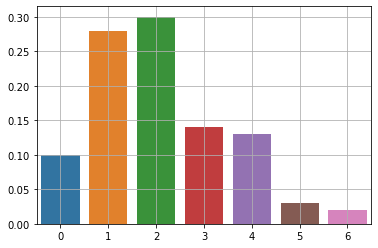

In [12]:
values, counts = np.unique(pmf, return_counts=True)


sns.barplot(x=values, y=counts / counts.sum())


plt.grid(True);

## Непрерывные случайные величины

Если $ X \in R $ - это случайная действительная величина, тогда X будет называться непрерывной случайной величиной. В этом случае невозможно создать конечную выборку. С другой стороны мы можем определить конечный набор интервалов для X. Если мы рассмотрим случайную величину которая определена как принадлежность к одному из этих интервалов, тогда мы можем использовать методы для дискретных случайных величин. При стремлении размера интервала к 0 мы можем определить вероятность X принять какое либо значение.

Примеры непрерывной случайной величины?

C:\Users\anton.nesterenko\Miniconda3\envs\mlisuct\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


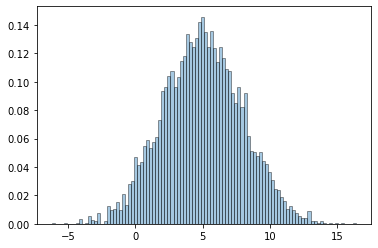

In [13]:
np.random.seed(0)


X = np.random.normal(5, 3, size=(5_000,))


kwargs = {"edgecolor": "k", "linewidth": 1}


sns.distplot(x=X, bins=100, kde=False, hist_kws=kwargs, norm_hist=True);

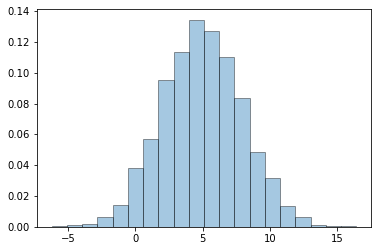

In [14]:
np.random.seed(0)


X = np.random.normal(5, 3, size=(5_000,))


kwargs = {"edgecolor": "k", "linewidth": 1}


sns.distplot(x=X, bins=20, kde=False, hist_kws=kwargs, norm_hist=True);

## Функция распределения (cdf - cumulative distribution function)

Это функция события $A = X \le x$

Определим:

- $ A = X \le a$
- $ B = X \le b$
- $ C = a \le X \le b$

Тогда:

- $ B = A \lor C$, из этого следует $ P(B) = P(A) + P(C) $
- $ P(C) = P(B) - P(A) $

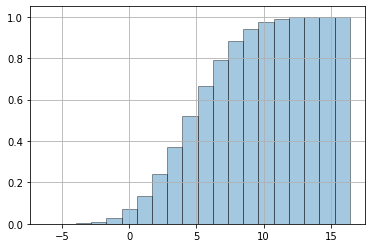

In [15]:
np.random.seed(0)


X = np.random.normal(5, 3, size=(5_000,))


kwargs = {"cumulative": True, "edgecolor": "k", "linewidth": 1}


sns.distplot(x=X, hist_kws=kwargs, bins=20, kde=False, norm_hist=True)


plt.grid(True);

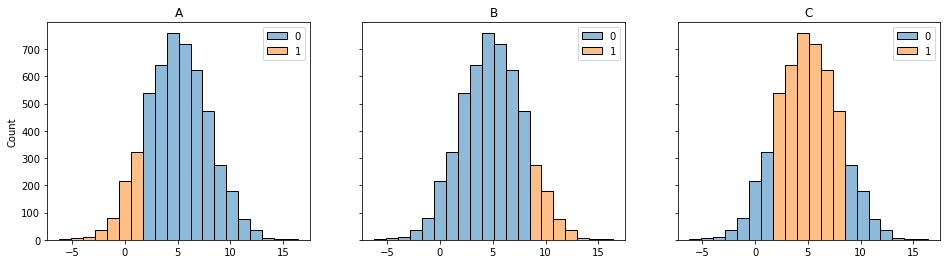

In [16]:
# event A


f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)


f.figure.set_figwidth(16)


np.random.seed(0)


X = np.random.normal(5, 3, size=(5_000,))


is_A = (X <= 1.7).astype(np.uint8)


ax1.set_title("A")


sns.histplot(x=X, bins=20, hue=is_A, ax=ax1)


ax2.set_title("B")


is_B = (X >= 8.49).astype(np.uint8)


sns.histplot(x=X, bins=20, hue=is_B, ax=ax2)


ax3.set_title("C")


is_C = ((X >= 1.7) & (X <= 8.49)).astype(np.uint8)


sns.histplot(x=X, bins=20, hue=is_C, ax=ax3);

## Функция вероятности

Определим функцию вероятности как производную от функции распределения

$\large {p(x) = \frac{dP(x)}{dx}}$

Тогда:

- $ P(A) =  \int_{-\infty}^{a} p(x) dx $
- $ P(B) =  \int_{b}^{\infty} p(x) dx $
- $ P(C) =  \int_{a}^{b} p(x) dx $

Вероятность P(X = x)?

## Квантили

Поскольку функция распределения монотонно возрастающая функция, то у нее есть обратная функция - функция квантилей (ppf, percent point function, quantile function).

Расмотрим $ P(X \le x) = q $ - Тогда функция квантилей будет определена как $ P^{-1}(q) = x $

- $ P^{-1}(0.5) $ - медиана
- $ P^{-1}(0.25) $ - нижний квартиль
- $ P^{-1}(0.75) $ - верхний квартиль

<a href="https://malishoaib.files.wordpress.com/2014/04/untitled.jpg">Таблица</a> для стандартного нормального распределения

In [17]:
X = np.random.randn(5_000)


q_25 = np.quantile(X, 0.25)


q_50 = np.quantile(X, 0.5)


q_75 = np.quantile(X, 0.75)


print(f"Нижний квартиль: {q_25}")


print(f"Медиана: {q_50}")


print(f"Верхний квартиль: {q_75}")


print(f"Отношение количества данных <= q_25: {X[X < q_25].shape[0]/X.shape[0]}")


print(f"Отношение количества данных <= q_50: {X[X < q_50].shape[0]/X.shape[0]}")


print(f"Отношение количества данных <= q_75: {X[X < q_75].shape[0]/X.shape[0]}")

Нижний квартиль: -0.6867898713403604
Медиана: -0.03095875648593684
Верхний квартиль: 0.6409258780878397
Отношение количества данных <= q_25: 0.25
Отношение количества данных <= q_50: 0.5
Отношение количества данных <= q_75: 0.75


## Множество связанных случайных величин

Представим что у нас есть 2 случайные величины X и Y. Мы можем определить совместное распределение $ p(x, y) = P(X = x, Y = y) $

Если оба случайных значения имеют конечную выборку мы можем их отобразить с помощью таблицы:

<table>
  <tr>
    <td>
    p(X, Y)
    </td>
    <td>
    Y = 0
    </td>
    <td>
    Y = 1
    </td>    
  </tr>
  <tr>
    <td>
    X = 0
    </td>
    <td>
    0.1
    </td>
    <td>
    0.4
    </td>    
  </tr>
  <tr>
    <td>
    X = 1
    </td>
    <td>
    0.2
    </td>
    <td>
    0.3
    </td>    
  </tr>
</table>

Если две величины независимы мы можем представить таблицу как произведение векторов P(X) и P(Y)

Имея таблицу совместного распределения мы можем расчитать вероятности P(X) и P(Y) через маргинализацию:

- $ p(X = x) = \sum_{y}p(X=x, Y=y) $
- $ p(Y = y) = \sum_{x}p(X=x, Y=y) $

Посчитать для данной таблицы

Определим условную вероятность как:

$ p(X = x| Y = y) = \frac{p(X = x, Y= y)}{p(Y)} $

Перенесем знаменатель в левую часть

$ p(x, y) = p(x|y)p(y) $

Данное выражение называется правилом произведения, его можно расширить до цепочки правил произведения

$ p(x_1, x_2, x_3, ... , x_n) = p(x_1)p(x_1|x_2)p(x_3|x_1, x_2)...p(x_n|x_{n-1}...x_1) $

Доказать для:

$ p(x_1, x_2, x_3) = p(x_1)p(x_1|x_2)p(x_3|x_1, x_2) $

In [22]:
X = np.array([0.2, 0.8])

Y = np.array([0.4, 0.6])


X.reshape(-1, 1).dot(Y.reshape(1, -1))

array([[0.08, 0.12],
       [0.32, 0.48]])

## Независимость и условная независимость

Если случайные величины $X_1, X_2, .. , X_n$ независимы, то

$ p(X_1, X_2, ... , X_n) = \prod_{i=1}^{n} p(X_i)$

Если случайные величины $X_1, X_2, .. , X_n$ независимы при условии Z, то

$ p(X_1, X_2, ... , X_n | z) = \prod_{i=1}^{n} p(X_i | Z)$